In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.text as text
sns.set_theme("notebook", style = "whitegrid")

%matplotlib inline

In [73]:
T=31
s_1=349.6
d=[0.8, 0.9, 1.0, 1.1, 1.2]
t_delay=np.array([0.00459, 0.00524, 0.0062, 0.00645, 0.00709])
d_2 = np.array([i*2 for i in d])

In [95]:
data = {'time delay': np.array([0.00459, 0.00524, 0.0062, 0.00645, 0.00709]),
        '2d(m)': np.array([i*2 for i in d]),
        'd(m)': np.array([0.8, 0.9, 1.0, 1.1, 1.2])}
df = pd.DataFrame(data)

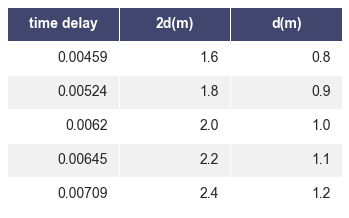

In [96]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(df, header_columns=0, col_width=2.0)
fig.savefig("table_mpl.png")

313.69022963539174
0.14483598193629382


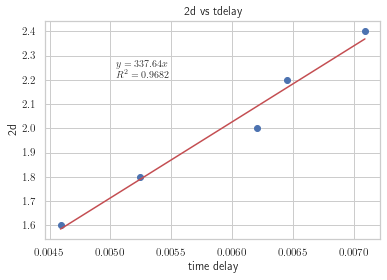

In [126]:
from matplotlib import rc
rc('text', usetex=True)
fig, ax = plt.subplots()
m, b = np.polyfit(t_delay, d_2, 1)
print(m)
print(b)
plt.plot(t_delay, d_2, 'o')
plt.plot(t_delay, m*t_delay + b, color="r")
plt.title("2d vs tdelay")
plt.xlabel("time delay")
plt.ylabel("2d")
ax.text(0.212, 0.79, r"$y=337.64x$", transform=ax.transAxes)
ax.text(0.212, 0.74, r"$R^{2}=0.9682$", transform=ax.transAxes)
plt.savefig("output.png")